**Group Assignment**
Group 16

##Objectives

## Data Preparation

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# load data
df1 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df1.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [3]:
# combining test and data together 
df2 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep= ',', header= None, skiprows=1)
df2.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.concat([df1, df2])

In [4]:
# make sure values are inputted the same
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'], regex=True)

In [5]:
# replacing '?' values with NaN
df = df.replace('[?]', np.nan, regex=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [7]:

# data information - NaN values
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [8]:
# dropping all NaN values
df = df.dropna()
df = df.dropna(axis=0)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
# 45222 entries after removing NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [10]:

# shows us the age, along with mean for education and how many hours they work per week.
pd.pivot_table(df, index = 'age', values = ['education-num','hours-per-week'])

,education-num,hours-per-week
age,,
17,6.699797,20.247465
18,8.141007,25.184173
19,9.028935,30.351852
20,9.308952,32.401747
21,9.385027,34.289840
...,...,...
86,14.000000,40.000000
87,9.000000,16.000000
88,10.200000,33.000000


In [11]:
# Drop columns fnlwgt 
# Consider dropping education or education-num (redundancy)
# Relationship or marital-status based on similiarity 
df = df.drop(['fnlwgt'], axis=1)

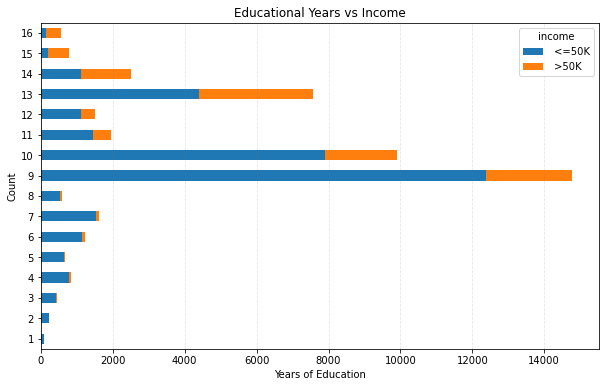

In [12]:
df_crosstab = pd.crosstab(df["education-num"], df["income"])
ax = df_crosstab.plot(kind='barh', stacked=True, rot=0, figsize=(10, 6));
ax.set(xlabel = "Years of Education", ylabel="Count", title="Educational Years vs Income")
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2);

Higher level of education correlated to higher ratio of individuals making >50k

In [13]:
# making age bins to make the data easier to read
df['age_bins'] = pd.cut(x=df['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])
df.groupby('age_bins').agg({'education-num': ['mean'],
                            'hours-per-week': ['mean']})

,education-num,hours-per-week
,mean,mean
age_bins,,
"(10, 20]",8.520553,28.096024
"(20, 30]",10.119288,39.727418
"(30, 40]",10.344317,43.485803
"(40, 50]",10.589489,43.658158
"(50, 60]",9.949254,42.749186
"(60, 70]",9.602622,36.563291
"(70, 80]",9.084291,28.275862


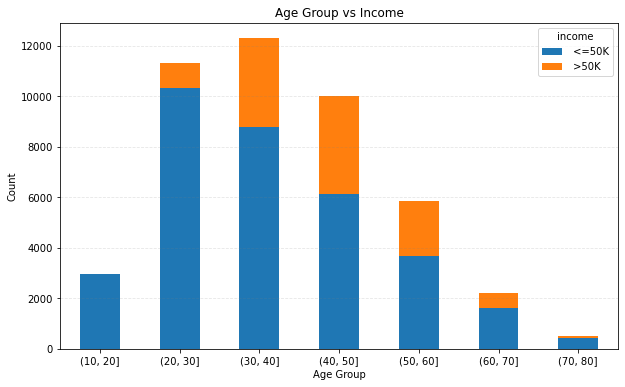

In [14]:
df_crosstabage = pd.crosstab(df["age_bins"], df["income"])
ax = df_crosstabage.plot(kind='bar', stacked=True, rot=0, figsize=(10, 6));
ax.set(xlabel = "Age Group", ylabel="Count", title="Age Group vs Income")
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2);

Graph visually depicts the disparity in income group between the age bins created with likelihood of making >50 k highest between 20-70.

In [15]:
# the breakdown between female and males
print(pd.pivot_table(df, index = 'income', columns = 'sex', values = 'occupation' ,aggfunc ='count'))

sex      Female   Male
income                
 <=50K    13026  20988
 >50K      1669   9539


In [16]:
df.groupby('income')
df_grouped_Pclass = df.groupby('income')
df_grouped_Pclass.mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,36.749427,9.630770,149.023402,54.032428,39.372023
>50K,44.006067,11.598501,3991.791667,193.487063,45.690489


The average age for people earning over 50K is higher than people earning less than 50K. We can also see that people earning over 50K went to school for longer and work more hours per week.

In [17]:
# unique values for race
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [18]:
# breakdown by race
df.groupby('race').agg({'race': ['count'],
                        'age': ['mean'],
                        'education-num': ['mean'],
                        'hours-per-week': ['mean']})

,race,age,education-num,hours-per-week
,count,mean,mean,mean
race,,,,
Amer-Indian-Eskimo,435,36.370115,9.420690,40.694253
Asian-Pac-Islander,1303,38.110514,11.045280,40.367613
Black,4228,37.995979,9.531220,38.910833
Other,353,33.838527,8.745042,39.736544
White,38903,38.689664,10.171503,41.191065


There is a large disparity in sample sizes between race with "whites" being the largest. Keep this mind when completing modeling

In [19]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"(30, 40]"
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(40, 50]"
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(30, 40]"
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(50, 60]"
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(20, 30]"


In [20]:
df.nunique()

age                74
workclass           7
education          16
education-num      16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
capital-gain      121
capital-loss       97
hours-per-week     96
native-country     41
income              2
age_bins            7
dtype: int64

In [21]:
df['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
16275              Private
16276              Private
16278              Private
16279              Private
16280         Self-emp-inc
Name: workclass, Length: 45222, dtype: object

## Univariate Analysis

In [22]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<Figure size 360x360 with 0 Axes>

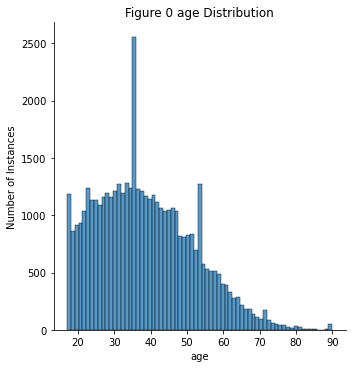

<Figure size 360x360 with 0 Axes>

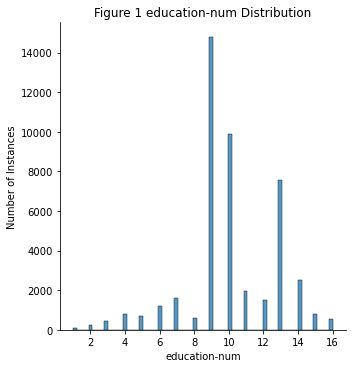

<Figure size 360x360 with 0 Axes>

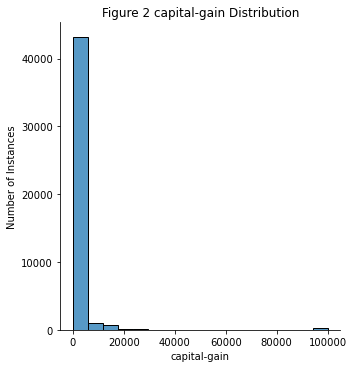

<Figure size 360x360 with 0 Axes>

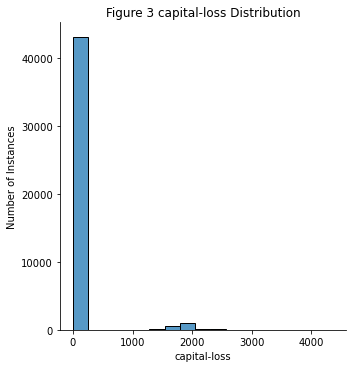

<Figure size 360x360 with 0 Axes>

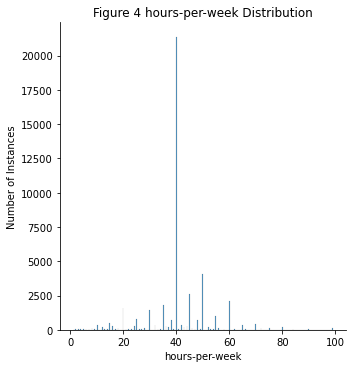

In [23]:
#Lydia start 
df_numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)
for i in range(len(df_numerical)):
  plt.figure(figsize=(5,5))
  sns.displot(df[df_numerical[i]])
  plt.ylabel("Number of Instances")
  plt.title("Figure " +str(i)+ " " +str(df_numerical[i])+ " Distribution")

plt.show(); 
#Lydia end

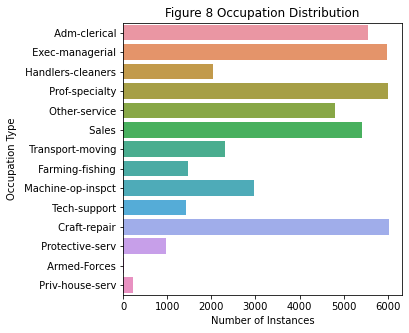

In [24]:
# occupation plot
fig = plt.figure(figsize=(5,5))
sns.countplot(data=df, y='occupation').set(title='Figure 8 Occupation Distribution', ylabel='Occupation Type', xlabel='Number of Instances');

<Figure size 720x360 with 0 Axes>

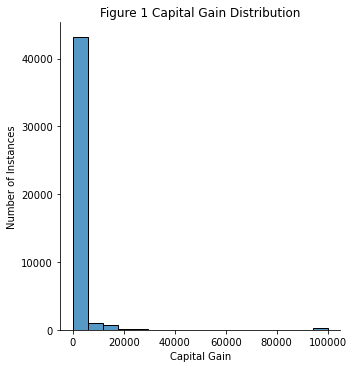

In [25]:
fig = plt.figure(figsize=(10,5))
sns.displot(df['capital-gain'])
plt.xlabel("Capital Gain")
plt.ylabel("Number of Instances")
plt.title("Figure 1 Capital Gain Distribution")
plt.show();

<Figure size 720x360 with 0 Axes>

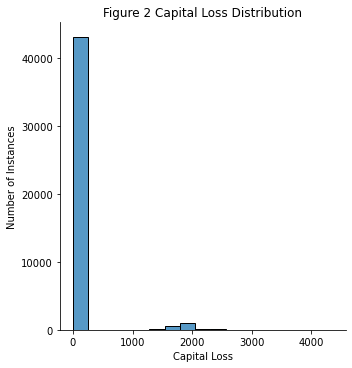

In [26]:
fig = plt.figure(figsize=(10,5))
sns.displot(df['capital-loss'])
plt.xlabel("Capital Loss")
plt.ylabel("Number of Instances")
plt.title("Figure 2 Capital Loss Distribution")
plt.show();

*age* Distribution:

In [27]:
print(df['age_bins'].value_counts()/len(df))

(30, 40]    0.271792
(20, 30]    0.249701
(40, 50]    0.220910
(50, 60]    0.128986
(10, 20]    0.065632
(60, 70]    0.048914
(70, 80]    0.011543
Name: age_bins, dtype: float64


Text(0.5, 1.0, '')

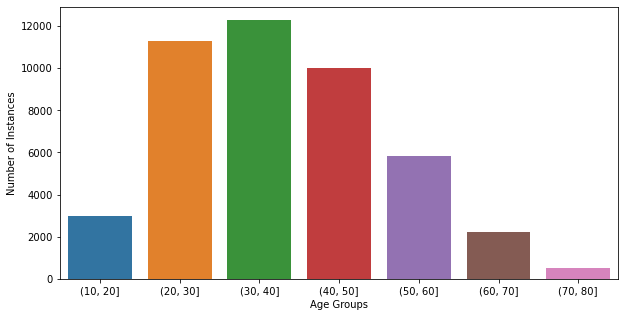

In [28]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_bins')
plt.xlabel("Age Groups")
plt.ylabel("Number of Instances")
plt.title("")

*workclass* Distribution:

In [29]:
print(df['workclass'].value_counts()/len(df))

 Private             0.736522
 Self-emp-not-inc    0.083941
 Local-gov           0.068551
 State-gov           0.043032
 Self-emp-inc        0.036398
 Federal-gov         0.031091
 Without-pay         0.000464
Name: workclass, dtype: float64


<AxesSubplot:xlabel='workclass', ylabel='count'>

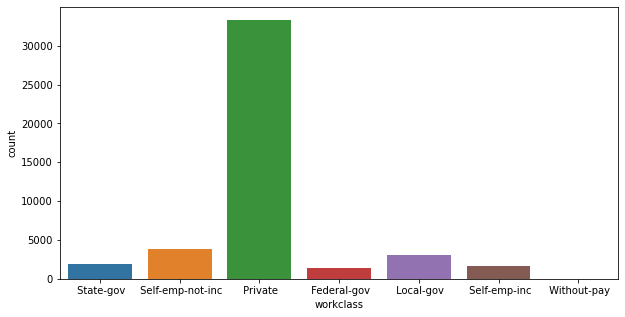

In [30]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='workclass')

*education-num* Distribution:

In [31]:
df[['sex','income','education-num']].groupby(['sex','education-num']).count()/df['sex'].count()

income
sex     education-num          
 Female 1              0.000442
        2              0.001238
        3              0.002410
        4              0.004356
        5              0.004135
        6              0.008646
        7              0.012295
        8              0.003958
        9              0.103069
        10             0.082128
        11             0.014926
        12             0.012936
        13             0.051524
        14             0.017757
        15             0.002742
        16             0.002388
 Male   1              0.001150
        2              0.003671
        3              0.007518
        4              0.013843
        5              0.010813
        6              0.018398
        7              0.023506
        8              0.008801
        9              0.223829
        10             0.136770
        11             0.028393
        12             0.020388
        13             0.115873
        14             0.037836
        15             0.014617
        16             0.009641

<AxesSubplot:xlabel='education-num', ylabel='count'>

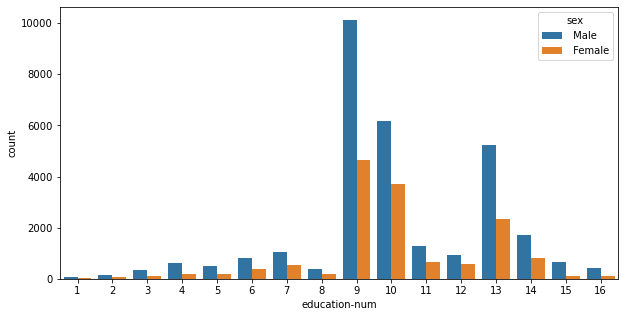

In [32]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education-num', hue='sex')

*marital-status* Distribution:

In [33]:
print(df['marital-status'].value_counts()/len(df))

 Married-civ-spouse       0.465592
 Never-married            0.322807
 Divorced                 0.139246
 Separated                0.031202
 Widowed                  0.028238
 Married-spouse-absent    0.012206
 Married-AF-spouse        0.000708
Name: marital-status, dtype: float64


<AxesSubplot:xlabel='marital-status', ylabel='count'>

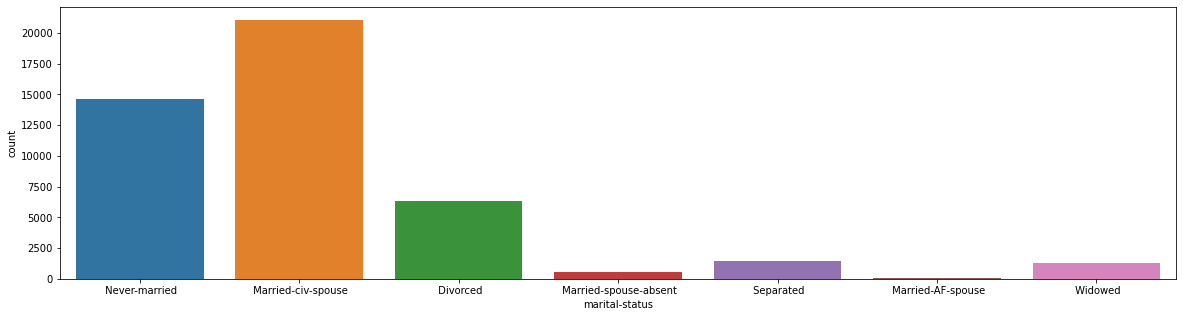

In [34]:
fig = plt.figure(figsize=(20,5))
sns.countplot(data=df, x='marital-status')

*sex* Distribution:

In [35]:
print(df['sex'].value_counts()/len(df))

 Male      0.675048
 Female    0.324952
Name: sex, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='count'>

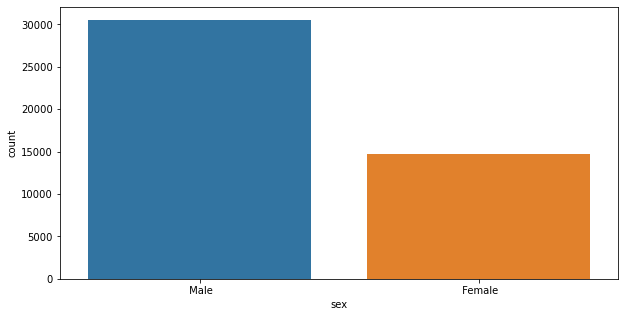

In [36]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sex')

*income* Distribution:

In [37]:
print(df['income'].value_counts()/len(df))

 <=50K    0.752156
 >50K     0.247844
Name: income, dtype: float64


<AxesSubplot:xlabel='income', ylabel='count'>

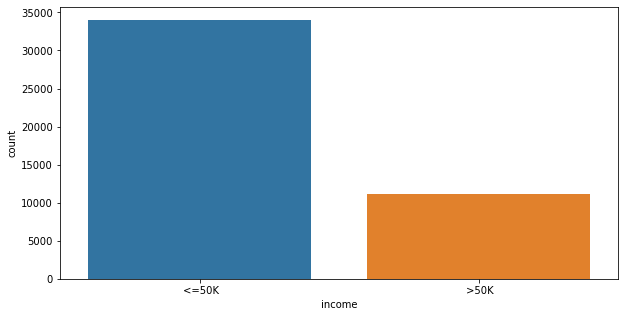

In [38]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='income')

## Bivariate Analysis

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'age_bins']
                   >50K  Total      rate
workclass                               
 Federal-gov        549   1406  0.390469
 Local-gov          915   3100  0.295161
 Private           7251  33307  0.217702
 Self-emp-inc       912   1646  0.554070
 Self-emp-not-inc  1059   3796  0.278978
 State-gov          520   1946  0.267215
 Without-pay          2     21  0.095238
               >50K  Total      rate
education                           
 10th            82   1223  0.067048
 11th            89   1619  0.054972
 12th            43    577  0.074523
 1st-4th          8    222  0.036036
 5th-6th         22    449  0.048998
 7th-8th         55    823  0.066829
 9th             38    676  0.056213
 Assoc-acdm     398   1507  0.264101
 Assoc-voc      504   1959  0.257274
 Bachelors     3178   7570  0

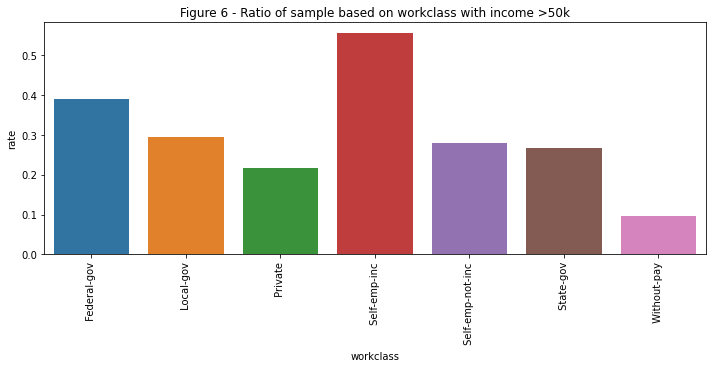

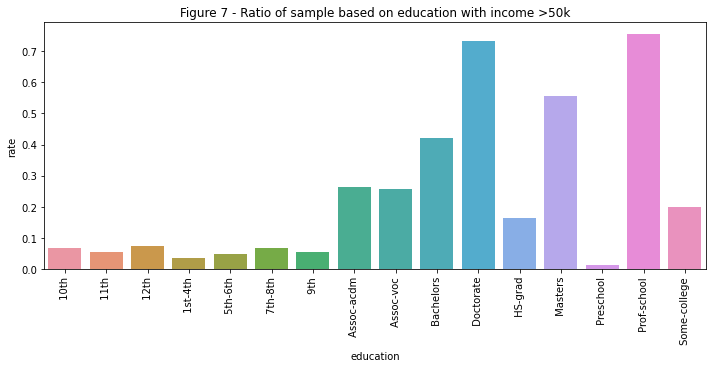

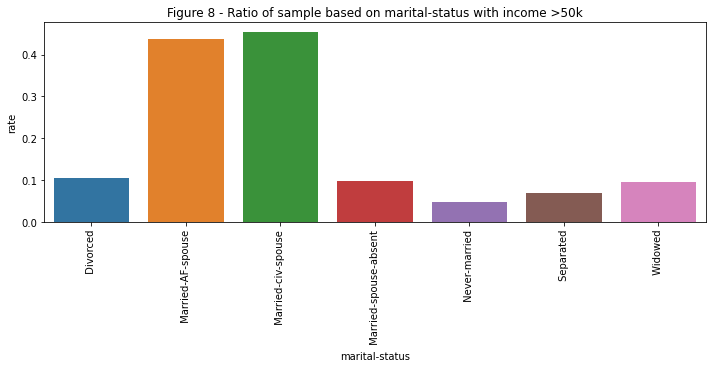

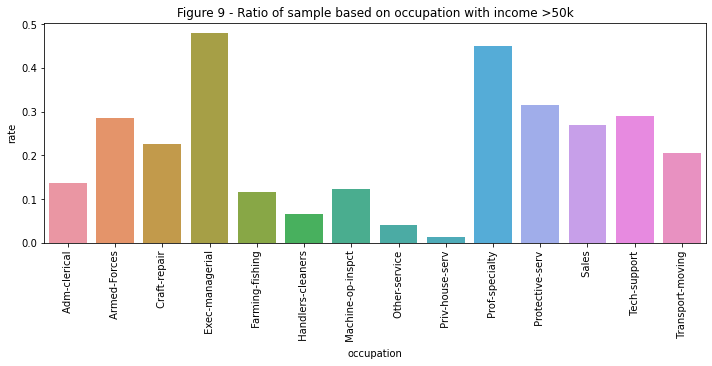

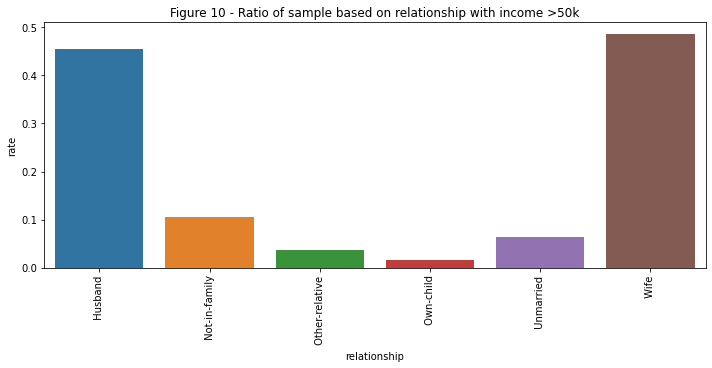

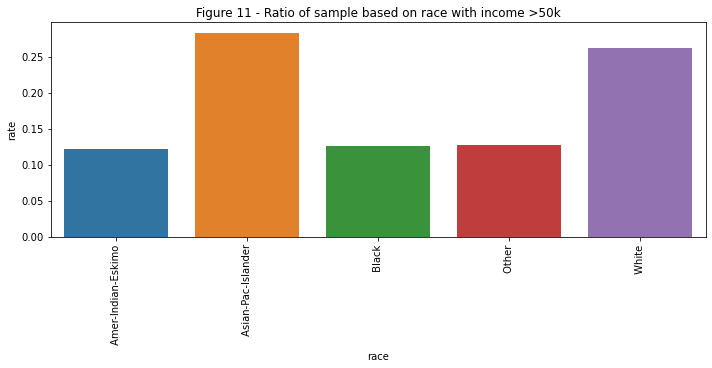

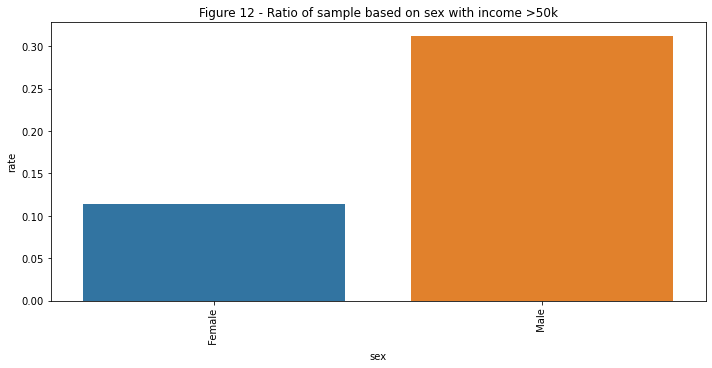

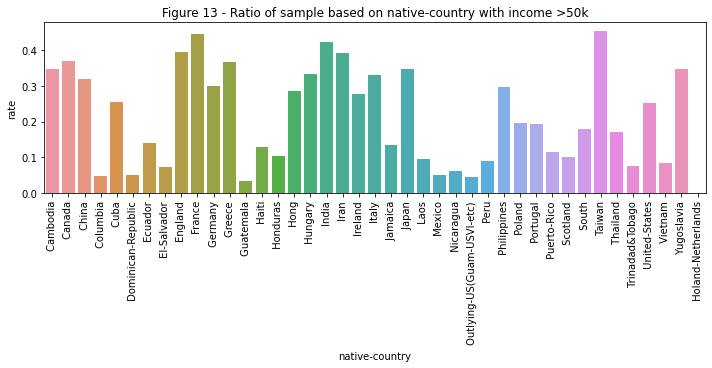

In [39]:
# Guanghan Xu --- start
# separate category vs numeric features for later use 
cat_features=list()
num_features=list()
for features in df.columns:
    if df[features].dtypes==object:
        cat_features.append(features)
    else: num_features.append(features)
cat_features.remove('income')
print(cat_features)
print(num_features)

# plot percentage of population with income>50K across all categorical features
for cat in cat_features:
    df1=df[df['income']==' >50K'].groupby(cat)['income'].count()
    df2=df.groupby(cat)['income'].count()
    df3=pd.concat([df1.rename('>50K'),df2.rename('Total')],axis=1)
    df3['rate']=df3['>50K']/df3['Total']
    plt.figure(figsize=(10,5)) # Emily: made size consistent
    sns.barplot(x=df3.index, y=df3['rate'], data=df3)
    plt.xticks(rotation=90)
    plt.tight_layout()

    index = cat_features.index(cat) + 6 # for reference purpose - Emily
    plt.title("Figure " + str(index) + " - Ratio of sample based on "+str(cat)+" with income >50k") #Lydia: added title.

    print(df3) # Emily: show stat
# Guanghan Xu --- end

Categorical Fields vs. *income*:

<AxesSubplot:xlabel='age_bins', ylabel='count'>

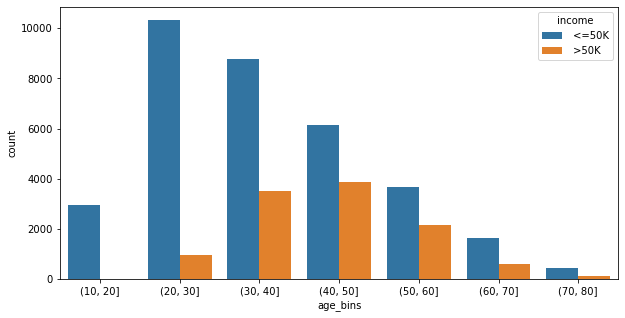

In [40]:
# age
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_bins', hue='income')

<AxesSubplot:xlabel='workclass', ylabel='count'>

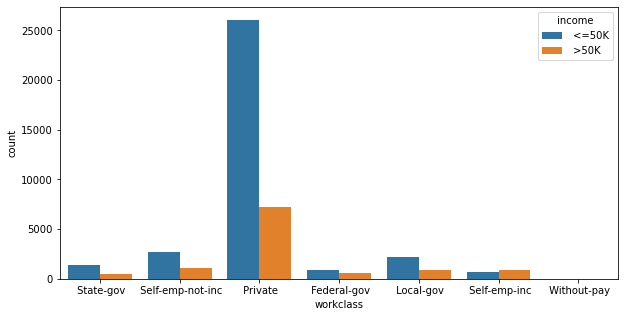

In [41]:
# workclass
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='workclass', hue='income')

<AxesSubplot:xlabel='marital-status', ylabel='count'>

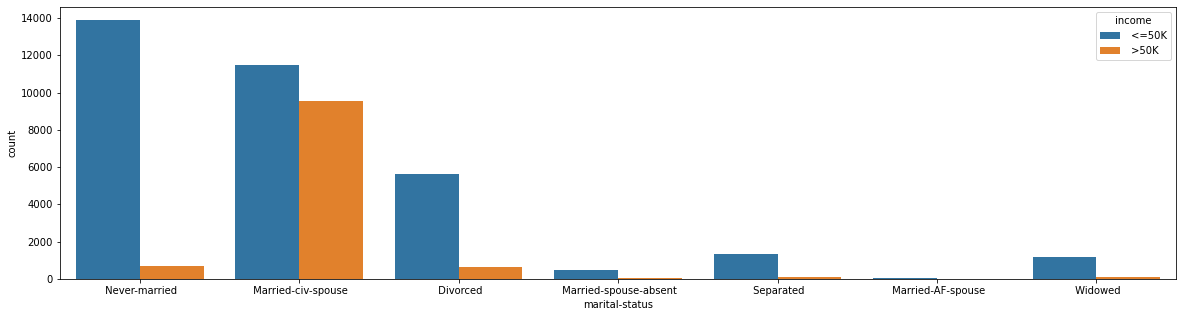

In [42]:
# marital-status
fig = plt.figure(figsize=(20,5))
sns.countplot(data=df, x='marital-status', hue='income')

<AxesSubplot:xlabel='sex', ylabel='count'>

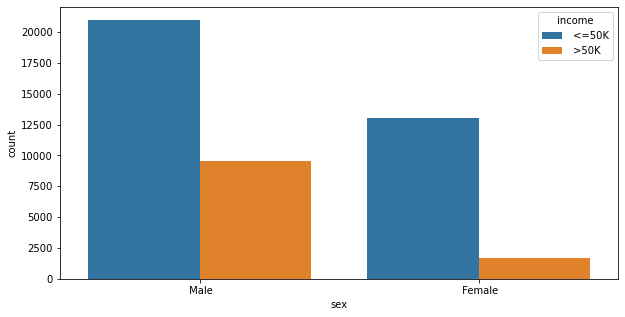

In [43]:
# sex
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sex', hue='income')

In [44]:
df_sex = pd.crosstab(df["income"], df["sex"])
df_sex

sex,Female,Male
income,,
<=50K,13026,20988
>50K,1669,9539


In [45]:
np.count_nonzero((df['sex'].isin([' Female'])) & df['income'].isin([' >50K']))/np.count_nonzero((df['sex'].isin([' Female']))), np.count_nonzero((df['sex'].isin([' Male'])) & df['income'].isin([' >50K']))/np.count_nonzero((df['sex'].isin([' Male'])))

(0.11357604627424293, 0.31247747895305794)

Average *education_num*:

In [46]:
# workclass
edu_inc_wc = df.pivot_table(index = ['income'], columns = ['workclass'], values = ['education-num'], aggfunc = 'mean')
edu_inc_wc

education-num                                                        \
workclass   Federal-gov  Local-gov    Private  Self-emp-inc  Self-emp-not-inc   
income                                                                          
 <=50K        10.390898  10.550572   9.442739     10.235695          9.667519   
 >50K         11.699454  12.163934  11.390291     11.948465         11.603399   

                                   
workclass  State-gov  Without-pay  
income                             
 <=50K     10.827489     8.947368  
 >50K      12.786538     9.000000

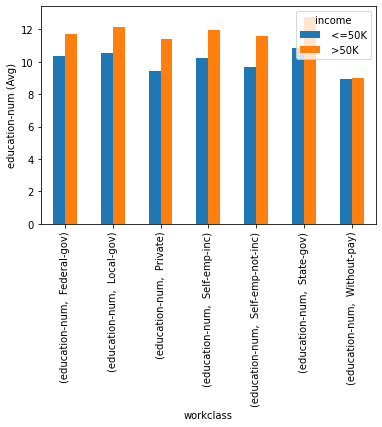

In [47]:
edu_inc_wc_ax = edu_inc_wc.T.plot(kind='bar', xlabel='workclass', ylabel='education-num (Avg)')

In [48]:
# sex
edu_inc_sex = df.pivot_table(index = ['income'], columns = ['sex'], values = ['education-num'], aggfunc = 'mean')
edu_inc_sex

education-num           
sex           Female       Male
income                         
 <=50K      9.882543   9.474509
 >50K      11.849011  11.554670

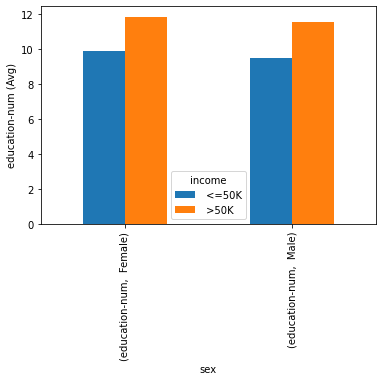

In [49]:
edu_inc_sex_ax = edu_inc_sex.T.plot(kind='bar', xlabel='sex', ylabel='education-num (Avg)')

Average hours-per-week:

In [50]:
# marital-status
hpw_inc_ms = df.pivot_table(index = ['income'], columns = ['marital-status'], values = ['hours-per-week'], aggfunc = 'mean')
hpw_inc_ms

hours-per-week                                         \
marital-status       Divorced  Married-AF-spouse  Married-civ-spouse   
income                                                                 
 <=50K              40.691421          41.166667           42.412758   
 >50K               47.334351          44.357143           45.512024   

                                                                            
marital-status  Married-spouse-absent  Never-married  Separated    Widowed  
income                                                                      
 <=50K                      39.236948      36.766065  39.523628  33.892734  
 >50K                       48.185185      46.721826  45.919192  43.776860

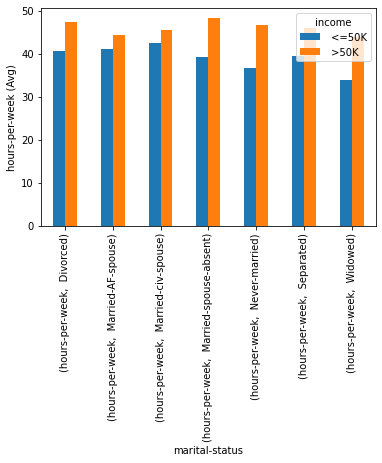

In [51]:
hpw_inc_ms_ax = hpw_inc_ms.T.plot(kind='bar', xlabel='marital-status', ylabel='hours-per-week (Avg)')

In [52]:
# sex
hpw_inc_sex = df.pivot_table(index = ['income'], columns = ['sex'], values = ['hours-per-week'], aggfunc = 'mean')
hpw_inc_sex

hours-per-week           
sex            Female       Male
income                          
 <=50K      36.391678  41.221746
 >50K       41.156980  46.483699

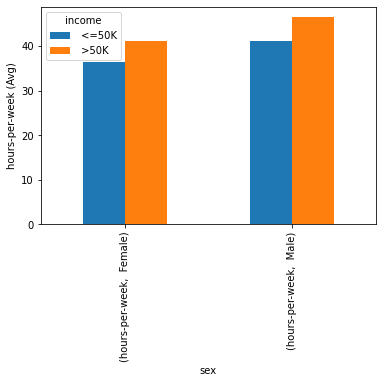

In [53]:
hpw_inc_sex_ax = hpw_inc_sex.T.plot(kind='bar', xlabel='sex', ylabel='hours-per-week (Avg)')

## Model

In [54]:
# Guanghan Xu ---- start

#feature selection
''' categorical features - a few are randomly selected as an illustration, those need to be explained and consistent with analysis above 
Please also make sure each categorical features has less than 5 unique values, otherwise below modeling part may not work well.'''
cat_features_shortlisted=["marital-status",'race','sex']
num_features_shortlisted=['age',"education-num"] # numerical features - also randomly selected for an illustration, feel free to add/exclude 


#feature transformation
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
ct = ColumnTransformer([("cat",categorical_transformer,cat_features_shortlisted)],remainder="passthrough")
X= df[cat_features_shortlisted+num_features_shortlisted]
X_trans = ct.fit_transform(X)
Y_trans = df['income'].replace(['<=50K', '>50K'], [0, 1], regex=True)


#train model and scores
neigh = KNeighborsClassifier(n_neighbors=10) # feel free to tweak n_neighbors or use the coding from assignment 4 until we have a good accuracy score
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y_trans, test_size=0.30,random_state=0)
neigh.fit(X_train, Y_train)
neigh.score(X_test, Y_test)

# Guanghan Xu ---- end

0.8083585169897546

# Report v2

##Objectives

## Data Preparation

In [55]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV

In [56]:
# load data
df1 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df1.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df2 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep= ',', header= None, skiprows=1)
df2.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [57]:
# combining test and data together 
df = pd.concat([df1, df2])

In [58]:
# make sure values are inputted the same
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'], regex=True)

In [59]:
# replacing '?' values with NaN
df = df.replace('[?]', np.nan, regex=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [61]:
# data information - NaN values
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [62]:
# dropping all NaN values
df = df.dropna()
df = df.dropna(axis=0)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Below attributes are excluded from this analysis:
* fnlwgt
* education
* occupation
* relationship
* capital-gain
* capital-loss
* native-country

In [63]:
edu_ref = df[['education', 'education-num']].value_counts().reset_index(name='count').sort_values('education-num')
edu_ref

,education,education-num,count
15,Preschool,1,72
14,1st-4th,2,222
13,5th-6th,3,449
8,7th-8th,4,823
10,9th,5,676
7,10th,6,1223
5,11th,7,1619
11,12th,8,577
0,HS-grad,9,14783
1,Some-college,10,9899


In [64]:
df = df.drop(['fnlwgt', 'education', 'relationship', 'capital-gain', 'capital-loss', 'native-country'], axis=1)

In [65]:
# 45222 entries after removing NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education-num   45222 non-null  int64 
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   race            45222 non-null  object
 6   sex             45222 non-null  object
 7   hours-per-week  45222 non-null  int64 
 8   income          45222 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [66]:
# making age bins to make the data easier to read
df['age_bins'] = pd.cut(x=df['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])
df.groupby('age_bins').agg({'education-num': ['mean'],
                            'hours-per-week': ['mean']})


,education-num,hours-per-week
,mean,mean
age_bins,,
"(10, 20]",8.520553,28.096024
"(20, 30]",10.119288,39.727418
"(30, 40]",10.344317,43.485803
"(40, 50]",10.589489,43.658158
"(50, 60]",9.949254,42.749186
"(60, 70]",9.602622,36.563291
"(70, 80]",9.084291,28.275862


## Univariate Analysis

In [67]:
df.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,income,age_bins
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,<=50K,"(30, 40]"
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K,"(40, 50]"
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,<=50K,"(30, 40]"
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K,"(50, 60]"
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K,"(20, 30]"


In [68]:
df.describe()

,age,education-num,hours-per-week
count,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,40.938017
std,13.217870,2.552881,12.007508
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


### *age*:

*age* attribute is right-skewed (Figure 1) with approximately 87.14% of the population aged 20 to 60. It perfectly aligns with the labour force age patterns.

In [69]:
# age group distribution
print(df['age_bins'].value_counts().sort_index(ascending=True)/len(df))

(10, 20]    0.065632
(20, 30]    0.249701
(30, 40]    0.271792
(40, 50]    0.220910
(50, 60]    0.128986
(60, 70]    0.048914
(70, 80]    0.011543
Name: age_bins, dtype: float64


In [70]:
# percentage of the population aged 20 to 60
print(df[(df['age'] > 20) & (df['age'] <= 60)].shape[0]/len(df))

0.8713900314006457


In [71]:
#determineconfidence mean interval of population within 90% 
import scipy.stats as st
st.t.interval(alpha=0.90, df=len(df['age'])-1, loc=np.mean(df['age']), scale=st.sem(df['age']))

(38.44570081705881, 38.650181717990506)

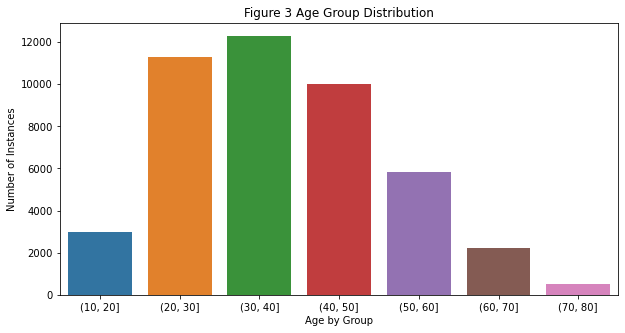

In [72]:
# Age plot
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_bins').set(title='Figure 3 Age Group Distribution', xlabel='Age by Group', ylabel='Number of Instances');

### *workclass*:

This dataset categorized its *occupations* data into 7 different types of *workclass*. About 73.65% of the population work in 'Private' sector.

In [73]:
# workclass distribution
print(df['workclass'].value_counts()/len(df))

 Private             0.736522
 Self-emp-not-inc    0.083941
 Local-gov           0.068551
 State-gov           0.043032
 Self-emp-inc        0.036398
 Federal-gov         0.031091
 Without-pay         0.000464
Name: workclass, dtype: float64


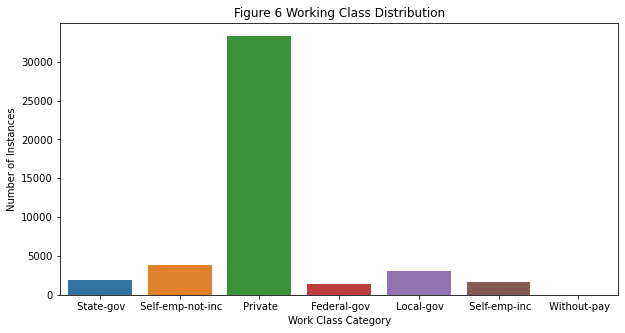

In [74]:
# workclass plot
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='workclass').set(title='Figure 6 Working Class Distribution', xlabel='Work Class Category', ylabel='Number of Instances');

### *education-num*:

*education_num* represents people's education level. According to the reference table below, approximately 32.69% of the population earned their high school diploma. 

1.20% of the population obtains a doctoral degree, while 0.16% of the population only completed their *preschool*.

In [75]:
display(edu_ref)

,education,education-num,count
15,Preschool,1,72
14,1st-4th,2,222
13,5th-6th,3,449
8,7th-8th,4,823
10,9th,5,676
7,10th,6,1223
5,11th,7,1619
11,12th,8,577
0,HS-grad,9,14783
1,Some-college,10,9899


In [76]:
# education_num distribution
print(df['education-num'].value_counts().sort_index(ascending=True)/len(df))

1     0.001592
2     0.004909
3     0.009929
4     0.018199
5     0.014948
6     0.027044
7     0.035801
8     0.012759
9     0.326898
10    0.218898
11    0.043320
12    0.033324
13    0.167396
14    0.055592
15    0.017359
16    0.012030
Name: education-num, dtype: float64


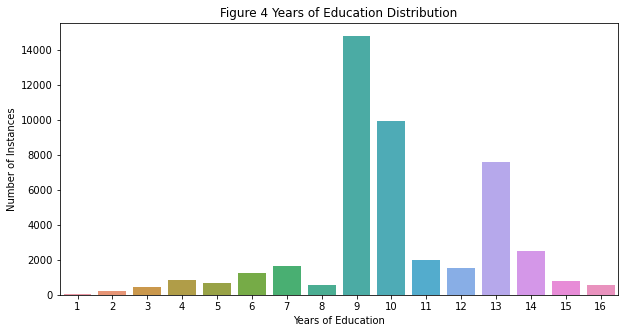

In [77]:
# education_num plot
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education-num').set(title='Figure 4 Years of Education Distribution', xlabel='Years of Education', ylabel='Number of Instances')
plt.show();

<Figure size 720x360 with 0 Axes>

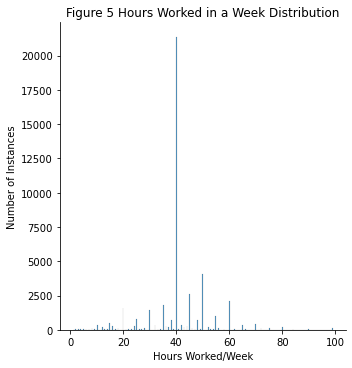

In [78]:
# hours worked in a week plot
fig = plt.figure(figsize=(10,5))
sns.displot(df['hours-per-week']).set(title='Figure 5 Hours Worked in a Week Distribution', xlabel='Hours Worked/Week', ylabel='Number of Instances')
plt.show();

### *marital-status*:

This attribute contains 7 different types of *marital-status*. Approximately 46.56% of the population are identified as *Married-civ-spouse*, and about 32.38% of the population are never married.

In [79]:
# marital-status distribution
print(df['marital-status'].value_counts()/len(df))

 Married-civ-spouse       0.465592
 Never-married            0.322807
 Divorced                 0.139246
 Separated                0.031202
 Widowed                  0.028238
 Married-spouse-absent    0.012206
 Married-AF-spouse        0.000708
Name: marital-status, dtype: float64


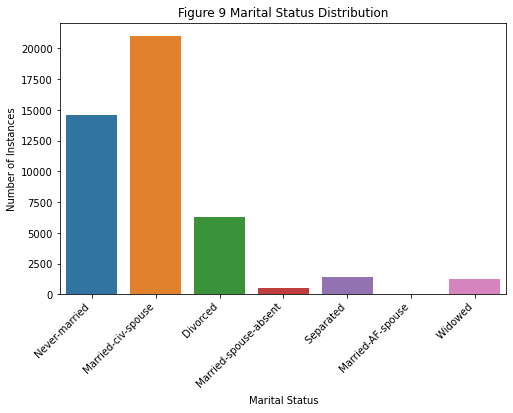

In [80]:
# marital-status plot
fig = plt.figure(figsize=(8,5))
sns.countplot(data=df, x='marital-status').set(title='Figure 9 Marital Status Distribution', xlabel='Marital Status', ylabel='Number of Instances')
plt.xticks(rotation=45, horizontalalignment='right');

### *sex*:

According to the gender distribution, 67.50% of the population are male while only 32.50% of the population are female.

In [81]:
# sex distribution
print(df['sex'].value_counts()/len(df))

 Male      0.675048
 Female    0.324952
Name: sex, dtype: float64


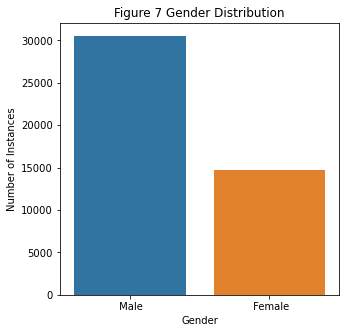

In [82]:
# sex plot
fig = plt.figure(figsize=(5,5))
sns.countplot(data=df, x='sex').set(title='Figure 7 Gender Distribution', xlabel='Gender', ylabel='Number of Instances');

In [83]:
#gender's role in income 
df[['sex','income','occupation']].value_counts()/df[['sex','occupation']].value_counts()*100

sex      occupation          income
 Female   Adm-clerical        <=50K     91.796247
                              >50K       8.203753
          Craft-repair        <=50K     89.841270
                              >50K      10.158730
          Exec-managerial     <=50K     75.812065
                              >50K      24.187935
          Farming-fishing     <=50K     96.842105
                              >50K       3.157895
          Handlers-cleaners   <=50K     96.837945
                              >50K       3.162055
          Machine-op-inspct   <=50K     96.469105
                              >50K       3.530895
          Other-service       <=50K     97.199092
                              >50K       2.800908
          Priv-house-serv     <=50K     98.623853
                              >50K       1.376147
          Prof-specialty      <=50K     74.035406
                              >50K      25.964594
          Protective-serv     <=50K     87.704918
              

### *income*:

*income*, the target attribute of this analysis, is skewed towards the population who earns less than 50K (75.22%).

In [84]:
print(df['income'].value_counts()/len(df))

 <=50K    0.752156
 >50K     0.247844
Name: income, dtype: float64


[Text(0.5, 1.0, 'Figure 5 - income')]

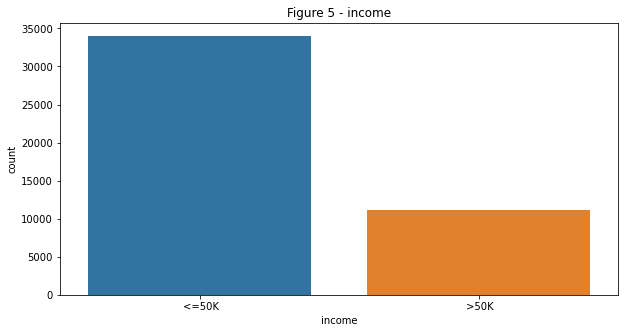

In [85]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='income').set(title='Figure 5 - income')

## Bivariate Analysis

In [86]:
# separate category vs numeric features for later use 
cat_features=list()
num_features=list()
for features in df.columns:
    if df[features].dtypes==object:
        cat_features.append(features)
    else: num_features.append(features)
cat_features.remove('income')
print(cat_features)
print(num_features)

['workclass', 'marital-status', 'occupation', 'race', 'sex']
['age', 'education-num', 'hours-per-week', 'age_bins']


**The answer to the sub-questions:**

**1. Which *workclass* is getting the highest income?**

55.41% of the population who are working at *self-emp-inc* are earning greater than 50K, followed by *Federal-gov*. Thus, *self-emp-inc* is getting the highest income. (Figure 6)

**2. Does marital status affect the income of an individual?**

Marital status has effect on individual's income. Individuals who are *Married-civ-spouse* (45.42%) and *Married-AF-spouse* (43.75%) are more likely to earn more than 50K comparing to individuals without a partner. (Figure 7)

**3. Which gender has better chance to get income greater than 50K?**
Male has better chance to get income greater than 50K than female. 31.24% of the male population are earning more than 50K, while only 11.35% of the female population are getting income greater than 50K.

**4. What is the relationship between income of an individual and age?**
Graph (Figure 9) visually depicts the disparity in income group between the age bins created with likelihood of making greater than 50K highest between 40-60. 

**5. What combination of education and gender gives high income?**
Higher level of education correlated to higher ratio of individuals making greater than 50K.

                   >50K  Total      rate
workclass                               
 Federal-gov        549   1406  0.390469
 Local-gov          915   3100  0.295161
 Private           7251  33307  0.217702
 Self-emp-inc       912   1646  0.554070
 Self-emp-not-inc  1059   3796  0.278978
 State-gov          520   1946  0.267215
 Without-pay          2     21  0.095238
                        >50K  Total      rate
marital-status                               
 Divorced                655   6297  0.104018
 Married-AF-spouse        14     32  0.437500
 Married-civ-spouse     9564  21055  0.454239
 Married-spouse-absent    54    552  0.097826
 Never-married           701  14598  0.048020
 Separated                99   1411  0.070163
 Widowed                 121   1277  0.094753
                    >50K  Total      rate
occupation                               
 Adm-clerical        756   5540  0.136462
 Armed-Forces          4     14  0.285714
 Craft-repair       1355   6020  0.225083
 Exec-m

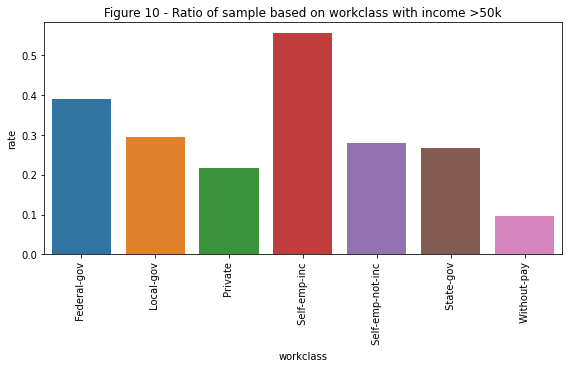

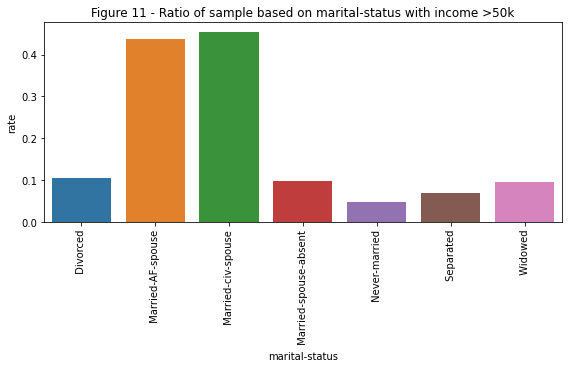

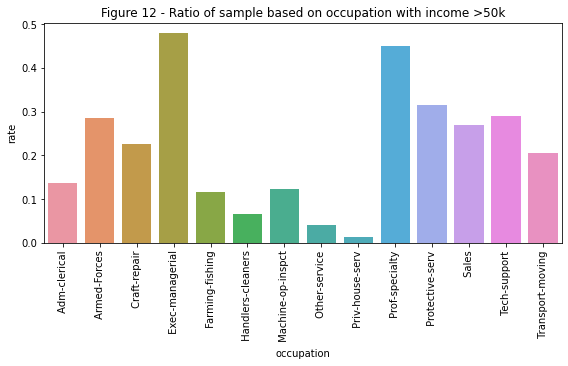

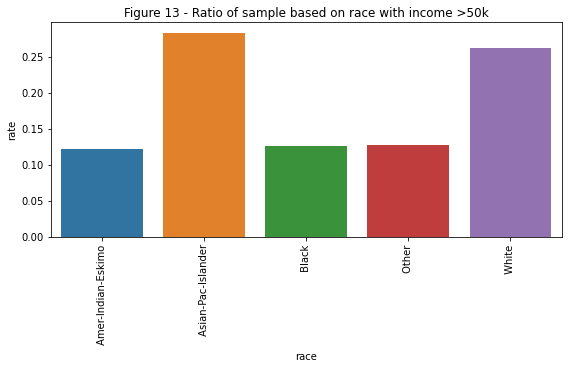

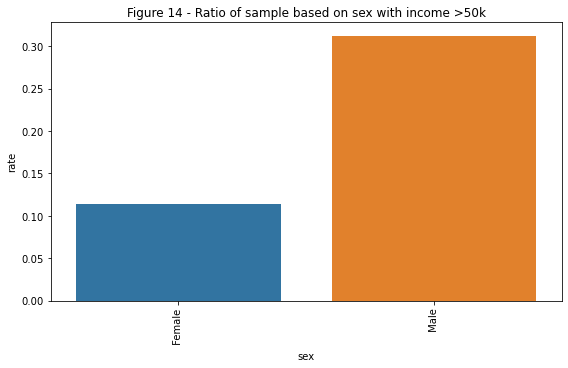

In [87]:
# plot percentage of population with income>50K across all categorical features
for cat in cat_features:
    df1=df[df['income']==' >50K'].groupby(cat)['income'].count()
    df2=df.groupby(cat)['income'].count()
    df3=pd.concat([df1.rename('>50K'),df2.rename('Total')],axis=1)
    df3['rate']=df3['>50K']/df3['Total']
    plt.figure(figsize=(8,5)) # Emily: made size consistent
    sns.barplot(x=df3.index, y=df3['rate'], data=df3)
    plt.xticks(rotation=90)
    plt.tight_layout()

    index = cat_features.index(cat) + 10
    plt.title("Figure " + str(index) + " - Ratio of sample based on " + str(cat) + " with income >50k")

    print(df3)

                >50K  Total      rate
hours-per-week                       
1                2.0     12  0.166667
2                3.0     24  0.125000
3                2.0     35  0.057143
4                5.0     47  0.106383
5                8.0     60  0.133333
...              ...    ...       ...
82               NaN      1       NaN
87               NaN      1       NaN
88               NaN      4       NaN
91               NaN      3       NaN
94               NaN      1       NaN

[96 rows x 3 columns]


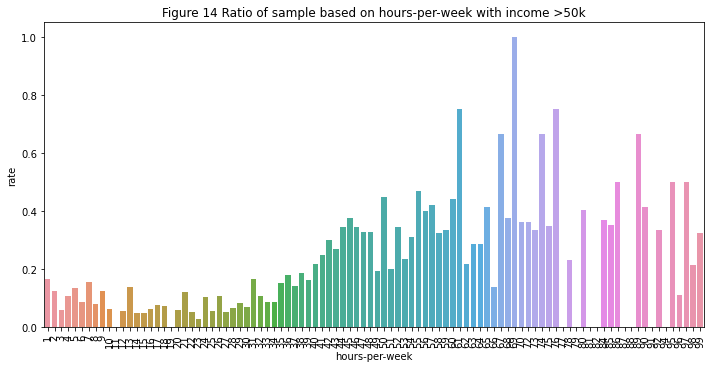

In [88]:
# plot percentage of population with income>50K - hours worked

num = 'hours-per-week'

df1=df[df['income']==' >50K'].groupby(num)['income'].count()
df2=df.groupby(num)['income'].count()
df3=pd.concat([df1.rename('>50K'),df2.rename('Total')],axis=1)
df3['rate']=df3['>50K']/df3['Total']
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index, y=df3['rate'], data=df3)
plt.xticks(rotation=90)
plt.tight_layout()

plt.title("Figure 14 Ratio of sample based on "+str(num)+" with income >50k")

print(df3)

          >50K  Total      rate
age_bins                       
(10, 20]     3   2968  0.001011
(20, 30]   961  11292  0.085104
(30, 40]  3506  12291  0.285249
(40, 50]  3859   9990  0.386286
(50, 60]  2169   5833  0.371850
(60, 70]   584   2212  0.264014
(70, 80]   103    522  0.197318


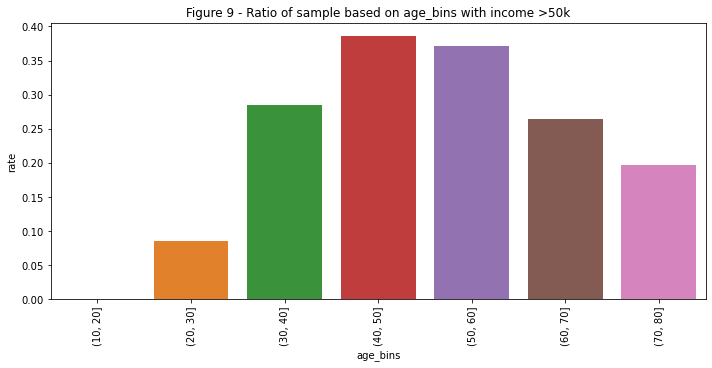

In [89]:
# plot percentage of population with income>50K - age_bins

num = 'age_bins'

df1=df[df['income']==' >50K'].groupby(num)['income'].count()
df2=df.groupby(num)['income'].count()
df3=pd.concat([df1.rename('>50K'),df2.rename('Total')],axis=1)
df3['rate']=df3['>50K']/df3['Total']
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index, y=df3['rate'], data=df3)
plt.xticks(rotation=90)
plt.tight_layout()

plt.title("Figure 9 - Ratio of sample based on " + str(num) + " with income >50k")

print(df3)

               >50K  Total      rate
education-num                       
1                 1     72  0.013889
2                 8    222  0.036036
3                22    449  0.048998
4                55    823  0.066829
5                38    676  0.056213
6                82   1223  0.067048
7                89   1619  0.054972
8                43    577  0.074523
9              2416  14783  0.163431
10             1990   9899  0.201030
11              504   1959  0.257274
12              398   1507  0.264101
13             3178   7570  0.419815
14             1393   2514  0.554097
15              592    785  0.754140
16              399    544  0.733456


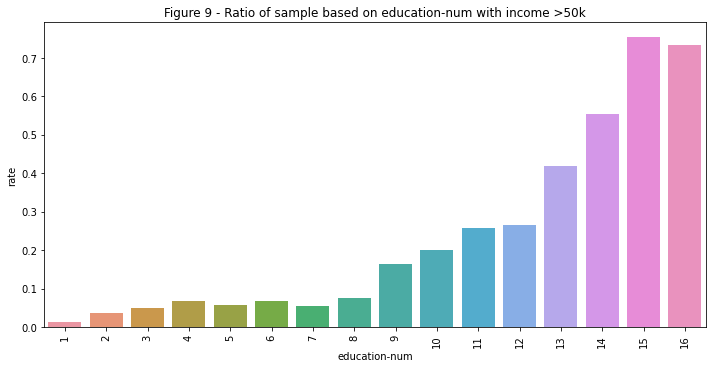

In [90]:
# plot percentage of population with income>50K - education-num

num = 'education-num'

df1=df[df['income']==' >50K'].groupby(num)['income'].count()
df2=df.groupby(num)['income'].count()
df3=pd.concat([df1.rename('>50K'),df2.rename('Total')],axis=1)
df3['rate']=df3['>50K']/df3['Total']
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index, y=df3['rate'], data=df3)
plt.xticks(rotation=90)
plt.tight_layout()

plt.title("Figure 9 - Ratio of sample based on " + str(num) + " with income >50k")

print(df3)

### Other:

* Observations who started working at an earlier age tend to have weaker educational background.
* Observations who are 20 to 60 years old are the main talent resource and labour force.

In [91]:
# shows us the age, along with mean for education and how many hours they work per week.
pd.pivot_table(df, index = 'age_bins', values = ['education-num','hours-per-week'])

,education-num,hours-per-week
age_bins,,
"(10, 20]",8.520553,28.096024
"(20, 30]",10.119288,39.727418
"(30, 40]",10.344317,43.485803
"(40, 50]",10.589489,43.658158
"(50, 60]",9.949254,42.749186
"(60, 70]",9.602622,36.563291
"(70, 80]",9.084291,28.275862


The average age for people earning over 50K is higher than people earning less than 50K. We can also see that people earning over 50K went to school for longer and work more hours per week.

## Model

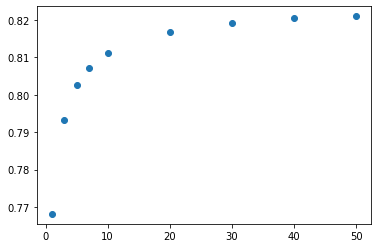

In [92]:
#feature selection
cat_features_shortlisted=["marital-status",'workclass','sex']
num_features_shortlisted=['age',"education-num", "hours-per-week"]

#feature preparation before final transformation
df.loc[(df['workclass'].str.startswith(' Self')),'workclass']=' Self-Employeed'
df.loc[(df['workclass'].str.endswith('-gov')),'workclass']=' Government'
df.loc[(df["marital-status"].str.startswith(' Married')),"marital-status"]=' Married'
df.loc[(df["marital-status"].isin([' Divorced',' Widowed',' Separated'])),"marital-status"]=' Other'

#feature transformation
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()
ct = ColumnTransformer([("cat",categorical_transformer,cat_features_shortlisted),("num", numeric_transformer, num_features_shortlisted)],remainder="passthrough")
X= df[cat_features_shortlisted+num_features_shortlisted]
X_trans = ct.fit_transform(X)
Y_trans = df['income'].replace(['<=50K', '>50K'], [0, 1], regex=True)

#train KNN model and tuning n_neighbors for the best average accuracy scores
avg_score_pred=list()
kvalue = [1, 3, 5, 7, 10, 20, 30, 40, 50]
for k in kvalue:
    neigh = KNeighborsClassifier(n_neighbors=k) 
    score=list()
    for i in range(10): # generate 10 random train/test splits
        X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y_trans, test_size=0.30,random_state=i)
        neigh.fit(X_train, Y_train)
        score.append(neigh.score(X_test, Y_test))
    avg_score_pred.append(sum(score)/len(score))    
plt.scatter(kvalue, avg_score_pred)

KNN classifier has highest accuracy rate when n_neighbors = 50

In [93]:
auc_score=roc_auc_score(Y_test, neigh.predict(X_test))
print(auc_score, avg_score_pred[-1])

0.7245180038856789 0.8209773715633524


In [94]:
auc_score=roc_auc_score(Y_test, neigh.predict(X_test))
print(auc_score, max(avg_score_pred))

0.7245180038856789 0.8209773715633524


In [95]:
#train logistic regression model and scores
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y_trans, test_size=0.30,random_state=42)
clf = LogisticRegressionCV(cv=5).fit(X_train, Y_train)
clf.score(X_test, Y_test)
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict(X_test))
roc_auc = auc(fpr, tpr)
auc_score=roc_auc_score(Y_test, clf.predict(X_test))
print(auc_score)

0.7076298657022024


In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#y_pred=logreg.predict(X_test)
#confusion_matrix = confusion_matrix(Y_test, y_pred)
#print(confusion_matrix)